# import

In [15]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# 전처리

In [16]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 모든 이미지를 224x224로 변환
    transforms.ToTensor(),  # Tensor 변환 (C, H, W)
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

# 데이터 경로

In [17]:
dataset_path = "C:/Users/ailab/pytorch/face/face/train"
dataset = ImageFolder(root=dataset_path, transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# 클래스 매핑

In [18]:
print(f"클래스 목록: {dataset.classes}")  # 폴더명을 기준으로 클래스 매핑
print(f"클래스 인덱스: {dataset.class_to_idx}")  # {'class_0': 0, 'class_1': 1, ...}

클래스 목록: ['소원', '신비', '엄지', '예린', '유주', '은하']
클래스 인덱스: {'소원': 0, '신비': 1, '엄지': 2, '예린': 3, '유주': 4, '은하': 5}


# 이미지 확인

In [19]:
images, labels = next(iter(dataloader))  # 첫 번째 배치 가져오기
print(f"이미지 텐서 크기: {images.shape}")  # (batch_size, C, H, W)
print(f"라벨: {labels[:10]}")  # 첫 10개 라벨 출력



이미지 텐서 크기: torch.Size([32, 3, 224, 224])
라벨: tensor([0, 3, 1, 5, 1, 3, 4, 4, 0, 5])


# 이미지 출력

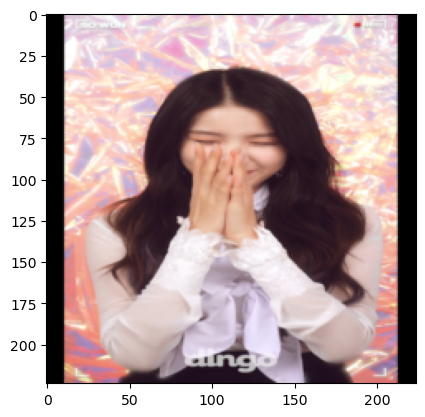

해당 클래스: 소원


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 텐서를 numpy 배열로 변환
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제 (mean=0.5, std=0.5 보정)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # (C, H, W) → (H, W, C)
    plt.show()

# 샘플 이미지 출력
imshow(images[0])
print(f"해당 클래스: {dataset.classes[labels[0]]}")
